# Normal 01a - THM concentration in tap water

# _Josep Fortiana_   $\hskip5cm$      2022-03-21

****
###### LaTeX macros
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\binomdist{\operatorname{Binomial}}$
$\def\berndist{\operatorname{Bernoulli}}$
$\def\betabinomdist{\operatorname{Beta-Binomial}}$
$\def\betadist{\operatorname{Beta}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\def\borel{\operatorname{Borel}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\cdf{\operatorname{cdf}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\diag{\operatorname{diag}}$
$\def\dprod{\displaystyle\prod}$
$\def\dsum{\displaystyle\sum}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\cZ{\cal Z}$
$\def\Ee{\operatorname{E}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\invgammadist{\operatorname{InvGamma}}$
$\def\invwishartdist{\operatorname{InvWishart}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\indep{\perp{\mskip-16mu}\perp}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\DeclareMathOperator{\invgammadist}{InvGamma}$
$\newcommand{\KL}[2]{\operatorname{KL}(\mkern2mu#1\mkern2mu\mathrel\mid\mathrel{\mkern-8mu}\mid\mkern2mu#2\mkern2mu)}$
$\def\laplacedist{\operatorname{Laplace}}$
$\def\lognormaldist{\operatorname{Log-Normal}}$
$\def\median{\operatorname{median}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinomial}$
$\def\N{\mathbb{N}}$
$\def\negbindist{\operatorname{NegativeBinomial}}$
$\def\normaldist{\operatorname{Normal}}$
$\def\Normaldist{\operatorname{MNormal}}$
$\def\pdf{\operatorname{pdf}}$
$\def\pmf{\operatorname{pmf}}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\prob{\operatorname{P}}$
$\def\R{\mathbb{R}}$ 
$\def\stilde{\tilde{s}}$ 
$\def\sqtilde{\tilde{s}{}^{2}}$ 
$\def\tdist{\operatorname{t}}$
$\def\u{\mathbb{1}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\Z{\mathbb{Z}}$
***

# Case study: THM concentrations ($\sigma$ known)

This problem appears in the [Web course _Bayesian Statistics for Epidemiologists_](http://www.columbia.edu/~cjd11/charles_dimaggio/DIRE/styled-4/styled-11/code-4/), 
also in Lunn _et al._ (2012) _The BUGS book,_ **Example 3.3.3.** pp. 43-45.

# Problem description and data

Regional water companies in the UK are required to take routine measurements of trihalomethane (THM) concentrations in tap water samples for regulatory purposes.
Samples are tested throughout the year in each water supply zone and analysed using an assay with known measurement error having standard deviation
$\sigma = 5\mu g/L$. We want to learn about the average concentration in a particular zone based on $n=2$  independent measurements, $x_{1}=128 \mu g/L$ and $x_{2}=132\mu g/L$; hence their 
mean, is $\overline{x}=130\mu g/L$.

What is the best estimate of the mean concentration $\theta$?

Suppose the water company will be fined if observed THM levels in the water supply exceed $145\mug/L$. What is the probability of this event?

In [1]:
n<-2
xbar<-130
sigma<-5

# Bayesian approach

Here we assume normal data: each of the $n=2$ measurements $x_{i}$, $i=1,2$, is a value from a $\normaldist(\theta,\sigma^{2})$ and they are independent.

Their mean $\xbar=\dfrac{x_{1}+x_{2}}{2}$ is, then, a value from a $\normaldist\big(\theta,\dfrac{\sigma^{2}}{2}\big)$.

## Specify model

$$
     \begin{array}{lcll}
     x_{i}  &\sim &\normaldist(\theta,\sigma^{2}),\mskip30mu 1\leq i\leq n,&\mskip60mu\text{Observed data,}\\[0.3cm]
     \theta &\sim &\normaldist(\mu,\gamma^{2}),                              &\mskip60mu\text{Prior.}
          \end{array}
$$

## Likelihood

The pdf (or likelihood) of \(x\), for a given $\theta$, is:

$$
    p(x\CondTo\theta)=\frac{1}{\sqrt{2\pi}\,\sigma}\,
    \exp\left\{-\frac{1}{2}\frac{(x-\theta)^{2}}{\sigma^{2}}\right\}
$$

## Prior

Suppose historical data on THM levels in other zones supplied from the same water source showed that the mean THM concentration was $120\mu g/L$ with standard
deviation $10\mu g/L$. This suggests a $\normaldist(120, 10^{2})$ prior for $\theta$.

We encode this information as a normal prior distribution for $\theta$, with mean $\mu=120$ and standard deviation $\gamma=10$.

$$
    \theta\sim\normaldist(\mu,\gamma^{2}), \mskip50mu \mu=120, \mskip50mu \gamma=10.
$$

The prior pdf of $\theta$, for given $\mu$, $\gamma^{2}$, is:

$$
    p(\theta)=\frac{1}{\sqrt{2\pi}\,\gamma}\,
    \exp\left\{-\frac{1}{2}\frac{(\theta-\mu)^{2}}{\gamma^{2}}\right\}
$$

## Conjugate pair formulas

Assume $X\sim\normaldist(\theta,\sigma^{2})$, where $\sigma$ is known (fixed, constant), and the prior distribution of $\theta$ is also a gaussian:
$\theta\sim\normaldist(\mu,\gamma^{2})$.

$\theta$'s posterior distribution, given the observed $x$, is also normal, $(\theta\CondTo x)\sim \normaldist(\mu_{x},\tau^{2})$, with parameters:

$$
\begin{eqnarray*}
    \Ee(\theta\CondTo x)&=&\mu_{x}\eqdef \displaystyle
    \frac{\gamma^{2}}{\sigma^{2}+\gamma^{2}}\,x+\frac{\sigma^{2}}{\sigma^{2}+\gamma^{2}}\,\mu\\[0.4cm]
    \var(\theta\CondTo x)&=&\tau^{2}\eqdef\displaystyle
    \frac{\sigma^{2}\,\gamma^{2}}{\sigma^{2}+\gamma^{2}}=\frac{1}{\mskip10mu\dfrac{1}{\sigma^{2}}+\dfrac{1}{\gamma^{2}}\mskip10mu}
\end{eqnarray*}
$$

Interpretation of the updated parameters:

- $\mu_{x}$ is a convex combination of $\mu$, the prior expectation, and the observed $x$. 

- Relative weight is inversely proportional to the variances $=$ **Precision.**

- Precision is _additive:_ $\dfrac{1}{\tau^{2}}=\dfrac{1}{\sigma^{2}}+\dfrac{1}{\gamma^{2}}$.

## Implicit virtual observations

This prior can be interpreted as if we had observed a certain number $n_{0}$ of _virtual observations_ with the same $\sigma$ as the current ones. 

This _equivalent number of implicit observations_ is computed from the equality $\dfrac{\sigma^{2}}{n_{0}}=\gamma^{2}$. In our case, $n_{0}=0.25$.

In [2]:
mu<-120
gamma<-10

## Prior predictive

Since:

$$
    x\sim\operatorname{N}(\theta,\sigma^{2}), \mskip10mu\text{and}\mskip10mu
    \theta\sim\operatorname{N}(\mu,\gamma^{2})
$$

the prior predictive distribution for each **individual** observation $x$ is $\sim\operatorname{N}(\mu,\sigma^2+\gamma^{2})$. 

_Should we be interested in the prior predictive distribution for the average $\overline{x}\sim\mbox{N}\big(\theta,\dfrac{\sigma^{2}}{n}\big)$, then we would have the prior predictive distribution $\sim\operatorname{N}\big(\mu,\dfrac{\sigma^{2}}{n}+\gamma^{2}\big)$._

In [3]:
Theor.mean.prior.pred<-mu
Theor.sd.prior.pred<-sqrt(sigma^2+gamma^2)
round(Theor.mean.prior.pred,4)
round(Theor.sd.prior.pred,4)

[1] 120

[1] 11.1803

### Simulate this prior predictive

In [4]:
N<-15000
set.seed(24025)

In [5]:
theta<-rnorm(N,mean=mu,sd=gamma)          # N samples from the prior
x1<-rnorm(N,mean=theta,sd=sigma)          # N samples from the likelihood, each with a different theta

In [6]:
Sim.mean.prior.pred<-mean(x1)
Sim.sd.prior.pred<-sd(x1)
round(Sim.mean.prior.pred,4)
round(Sim.sd.prior.pred,4)

[1] 119.97

[1] 11.1633

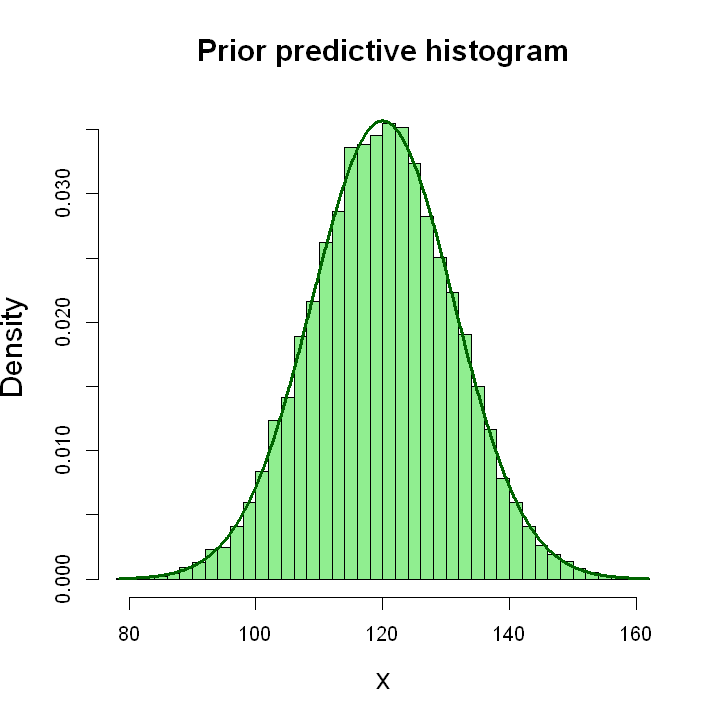

In [7]:
x.min<-min(x1)
x.max<-max(x1)
options(repr.plot.width=6,repr.plot.height=6)
hist(x1,breaks=35,freq=FALSE,col="LightGreen",xlim=c(x.min,x.max),ylim=c(0,0.036),
     xlab="x",main="Prior predictive histogram",cex.lab=1.5,cex.main=1.5)
# Superimpose the theoretical density
x<-seq(x.min,x.max,length=1000)
lines(x,dnorm(x,mean=Theor.mean.prior.pred,sd=Theor.sd.prior.pred),lwd=3.0,col="DarkGreen")

## Posterior

The posterior distribution for $\theta$, given $\overline{x}$, is normal, with mean $\mu_{x}$ and sd $\tau$. 

$\mu_{x}$ is a convex combination of $\mu$ and $\overline{x}$.

$$
	(\theta\,|\,\overline{x})\sim\mbox{N}(\mu_{x},\tau^{2}),
$$

In [9]:
alpha<-(sigma^2/n)/((sigma^2/n)+gamma^2)
mux<-alpha*mu+(1-alpha)*xbar
tau2<-((sigma^2/n)*gamma^2)/((sigma^2/n)+gamma^2)
tau<-sqrt(tau2)
round(mux,4)
round(tau2,4)
round(tau,4)

[1] 128.8889

[1] 11.1111

[1] 3.3333

## Comparison of prior, observed, and posterior pdf's

In [10]:
bayes.normal<-function(x,mu,sigma,gamma){
    lambda<-sigma^2/(sigma^2+gamma^2)
    mux<-lambda*mu+(1-lambda)*x
    tau2<-lambda*gamma^2
    tau<-sqrt(tau2)
    maxsigma<-max(sigma,gamma,tau)
    minmu<-min(mu,x,mux)
    maxmu<-max(mu,x,mux)
    minx<-minmu-2.0*maxsigma
    maxx<-maxmu+2.0*maxsigma
    u<-seq(minx,maxx,length=1000)
    prior<-dnorm(u,mean=mu,sd=gamma)
    obs<-dnorm(u,mean=x,sd=sigma)
    post<-dnorm(u,mean=mux,sd=tau)
    maxy<-max(prior,obs,post)
    plot(u,prior,type="l",lwd=3.0,ylim=c(0,maxy*1.1),col="green",
        xlab="",ylab="",main="Prior, observation and posterior",cex=3)
    lines(u,obs,lwd=2.5,col="blue")
    lines(u,post,lwd=2.5,col="red")
    legend("topleft",legend=list("Prior","Obs","Post"),lty="solid",lwd=2.5,col=c("green","blue","red"))
    }

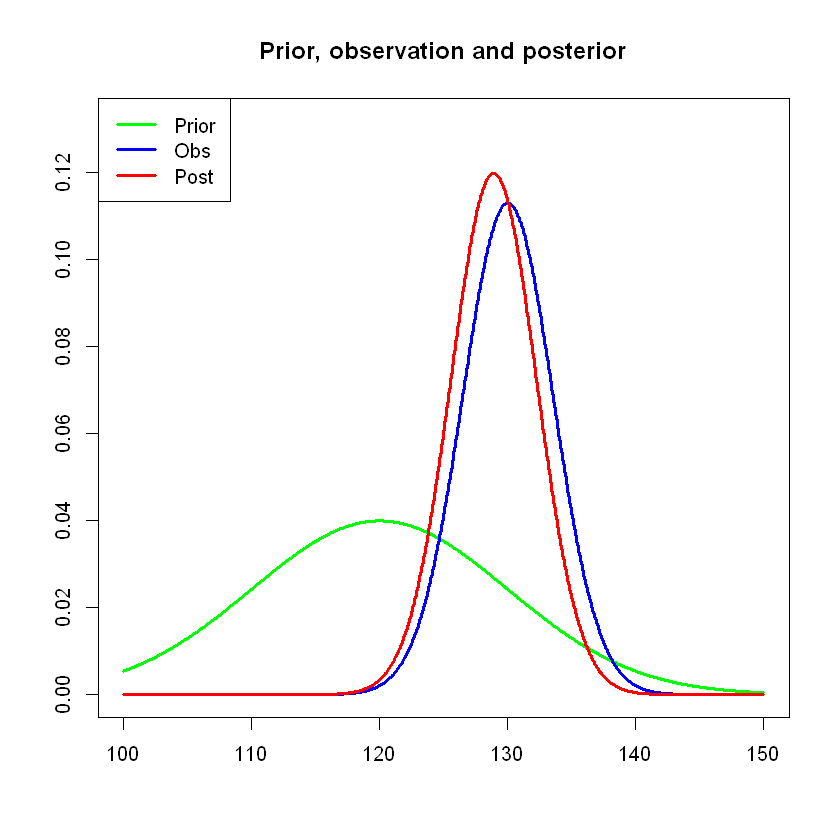

In [11]:
options(repr.plot.width=7,repr.plot.height=7)
bayes.normal(130,120,5/sqrt(2),10)

## Credible interval

With the posterior distribution for $\theta$, given $\overline{x}$,	we obtain the interval $(a,b)$, such that $P(a<\theta<b)=0.95$. This interval is centered on $\mu_{x}=128.9$ instead of on $\overline{x}=130$:

In [12]:
a<-qnorm(0.025,mean=mux,sd=tau)
b<-qnorm(0.975,mean=mux,sd=tau)
Credible.Int.95<-c(a,b)
round(Credible.Int.95,4)
#[1] 122.3557 135.4221

[1] 122.3557 135.4221

## Posterior predictive distribution

The posterior predictive distribution for a new observation $\widetilde{x}$, given the observed $\overline{x}$, is normal, with mean $\mu_{x}$ and variance the sum $\sigma^{2}+\tau^{2}$.

In [13]:
Theor.m.post.pred<-mux
Theor.var.post.pred<-sigma^2+tau^2
Theor.sd.post.pred<-sqrt(Theor.var.post.pred)
round(Theor.m.post.pred,3)
round(Theor.var.post.pred,3)
round(Theor.sd.post.pred,3)

[1] 128.889

[1] 36.111

[1] 6.009

## Predicting next semester probability of fine

This posterior predictive distribution can be used to compute the probability that the water company will be fined next semester, which will happen if next month measurement (predicted)  $\widetilde{𝑥}$  exceeds  $x_{\text{crit}}=145$.

In [14]:
p.fine<-1-pnorm(145,mean=Theor.m.post.pred,sd=Theor.sd.post.pred)
round(p.fine,5)
# [1] 0.003669567

[1] 0.00367